# Plots for paper

In [1]:
%matplotlib inline
import gc
%config InlineBackend.figure_format = 'retina'
from matplotlib.pylab import *
import matplotlib.pyplot as plt 
rcParams['figure.figsize'] = (12,9)
rcParams['font.size'] = 34
#import logging

In [2]:
import pynbody
import pynbody.plot.sph as sph
import mmap
pynbody.ramses.multiprocess_num = 12
pynbody.config['number_of_threads'] = 32

In [3]:
pynbody.openmp.get_cpus()

24

## We need output 16 and 121 for the paper ... These correspond to z = 16 and z = 8 respectively

In [4]:
gc.collect()

1110

In [5]:
s = pynbody.load('output_00016')
s['pos']
s['pos'] -= 0.5
s.physical_units();

/Users/earnric/anaconda/lib/python3.4/site-packages/pynbody/snapshot/ramses.py:474: UserWarning: Using field 'tform'>0 as criterion to distinguish stars. If this is wrong, try editing your config.ini, section [ramses], entry particle-distinguisher.
  warnings.warn("Using field %r>0 as criterion to distinguish stars. If this is wrong, try editing your config.ini, section [ramses], entry particle-distinguisher."%self._particle_blocks[distinguisher_field])


In [6]:
z = 1/s.properties['a']-1
print ("Redshift =",z)
boxsizestring = "%.2f" % s.properties['boxsize'].in_units('kpc')
boxsizestring += " kpc"
print (boxsizestring)

Redshift = 15.999252484667519
248.10 kpc


In [7]:
s.g['metal'][s.g['metal']<=1e-7]    = 1e-10 # Since we divide by Z below, don't use 0.0
#s.g['pgf'][s.g['pgf']>(1.0-1e-10)]  = 1.0
s.g['pzf'][s.g['pzf']<=1e-7]        = 1e-10
s.g['zsolar']  = s.g['metal'] * 50.0         # Solar units
s.g['pzsolar'] = s.g['pzf'] * 50.0           # Solar units

#s.s['metal'][s.s['metal']<1e-10]    = 1e-10
#s.s['ppf'][s.s['ppf']>(1.0-1e-10)]  = 1.0
#s.s['pzf'][s.s['pzf']<1e-10]        = 1e-10
#s.s['zsolar']  = s.s['metal'] * 50.0         # Solar units
#s.s['pzsolar'] = s.s['pzf'] * 50.0           # Solar units


In [8]:
sbox = 40.0 / (1.0 + z) * 0.71 # 40 kpc comoving box
smallbox = str(sbox) + " kpc"
print(smallbox)

1.6706616967784547 kpc


In [9]:
# z=16, i=0 : -20.26, -122.12, 40.22
# z=16, i=770 : 43.96, 26.56, 121.94
# z=16, i=1540 : 44.54, 19.03, 118.77

rx,ry,rz = 44.54, 19.03, 118.77
i=1540
print(rx,ry,rz)

impData = s[pynbody.filt.Cuboid(str((rx-sbox/2.0)) + " kpc", str((ry-sbox/2.0)) + " kpc",str((rz-sbox/4.0)) + " kpc",
                                str((rx+sbox/2.0)) + " kpc", str((ry+sbox/2.0)) + " kpc",str((rz+sbox/4.0)) + " kpc")]

44.54 19.03 118.77


In [10]:
print(z,i)

15.999252484667519 1540


In [14]:
coords= [-rx,-ry,-rz] # Translation requires negative of the coord
with pynbody.transformation.translate(impData,coords):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.yaxis.set_visible(False)
    #ax.set_xlabel(fontsize=40)
    fileOut="img_log_Z-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "$Z_{\odot}$ - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="zsolar",width=smallbox,cmap="nipy_spectral", denoise=True ,av_z=False, subplot=ax,
                      log=True, vmax=1.0, vmin=1e-7, qtytitle="$log_{10}\; Z_{\odot}$", approximate_fast=False
                      ); #vmin=0.006, vmax=1.0,
    ax.set_xticks([-0.7, 0, 0.7])
    ax.set_xticklabels(['-0.7','0','0.7'])
    plt.savefig(fileOut)
    plt.close(fig)
            
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fileOut="img_log_PGF-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "PGF - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="pgf",width=smallbox,cmap="nipy_spectral", denoise=True ,av_z=False,subplot=ax,
                      log=True, vmax = 1.0, vmin=1e-7, qtytitle="$log_{10}\; PGF$",approximate_fast=False
                      ); #vmin=0.006, vmax=1.0,
    ax.set_xticks([-0.7, 0, 0.7])
    ax.set_xticklabels(['-0.7','0','0.7'])
    ax.set_yticks([-0.7, 0, 0.7])
    ax.set_yticklabels(['-0.7','0','0.7'])
    plt.savefig(fileOut)
    plt.close(fig)
            
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.yaxis.set_visible(False)
    fileOut="img_log_PZ-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "$Z_{P, \odot}$ - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="pzsolar",width=smallbox,cmap="nipy_spectral", denoise=True ,av_z=False,subplot=ax,
                      log=True, vmax=1.0, vmin=1e-7, qtytitle="$log_{10}\; Z_{P,\odot}$", approximate_fast=False
                      ); #vmin=0.006, vmax=1.0,
            
    ax.set_xticks([-0.7, 0, 0.7])
    ax.set_xticklabels(['-0.7','0','0.7'])
    plt.savefig(fileOut)
    plt.close(fig)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.xaxis.set_visible(False)
    fileOut="img_log_Density-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "Density - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="rho",width=smallbox,cmap="terrain", denoise=True ,av_z=False,
                      log=True, approximate_fast=False,subplot=ax,qtytitle="$log_{10}\; M_{\odot}/kpc^{3}$"
                      ); #vmin=0.006, vmax=1.0,
    ax.set_yticks([-0.7, 0,0.7])
    ax.set_yticklabels(['-0.7','0','0.7'])
    plt.savefig(fileOut)
    plt.close(fig)
    
    del(ax)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    fileOut="img_log_Temp-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "Temp - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="temp",width=smallbox,cmap="RdYlBu_r", denoise=True ,av_z=False,
                      log=True, approximate_fast=False,subplot=ax,qtytitle="$log_{10}\; Temp\, [K]$"
                      ); #vmin=0.006, vmax=1.0,
    plt.savefig(fileOut)  # Needed since filename=fileOut doesn't include the vel vecs
    plt.close(fig)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    fileOut="img_log_vt-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "$v_{t}$ @ z = %.1f" % z + "\nThin slice @ %s" % str(coords)
    print(titleStr)
    sph.velocity_image(impData.g, qty="tv", width=smallbox, cmap = "gist_ncar", 
                    mode='quiver', key_color='black',qtytitle="$log_{10}\; v\, km/s$",
                       key_x=0.2, key_y=0.1,quiverkey_bg_color='w',
                   density = 1.0, vector_resolution=40, vmax=1e3,subplot=ax,
                   show_cbar=True, vector_color='black')
    plt.savefig(fileOut)  # Needed since filename=fileOut doesn't include the vel vecs
    plt.close(fig)

$Z_{\odot}$ - z = 16.0
PGF - z = 16.0
$Z_{P, \odot}$ - z = 16.0
Density - z = 16.0
Temp - z = 16.0
$v_{t}$ @ z = 16.0
Thin slice @ [-44.54, -19.03, -118.77]


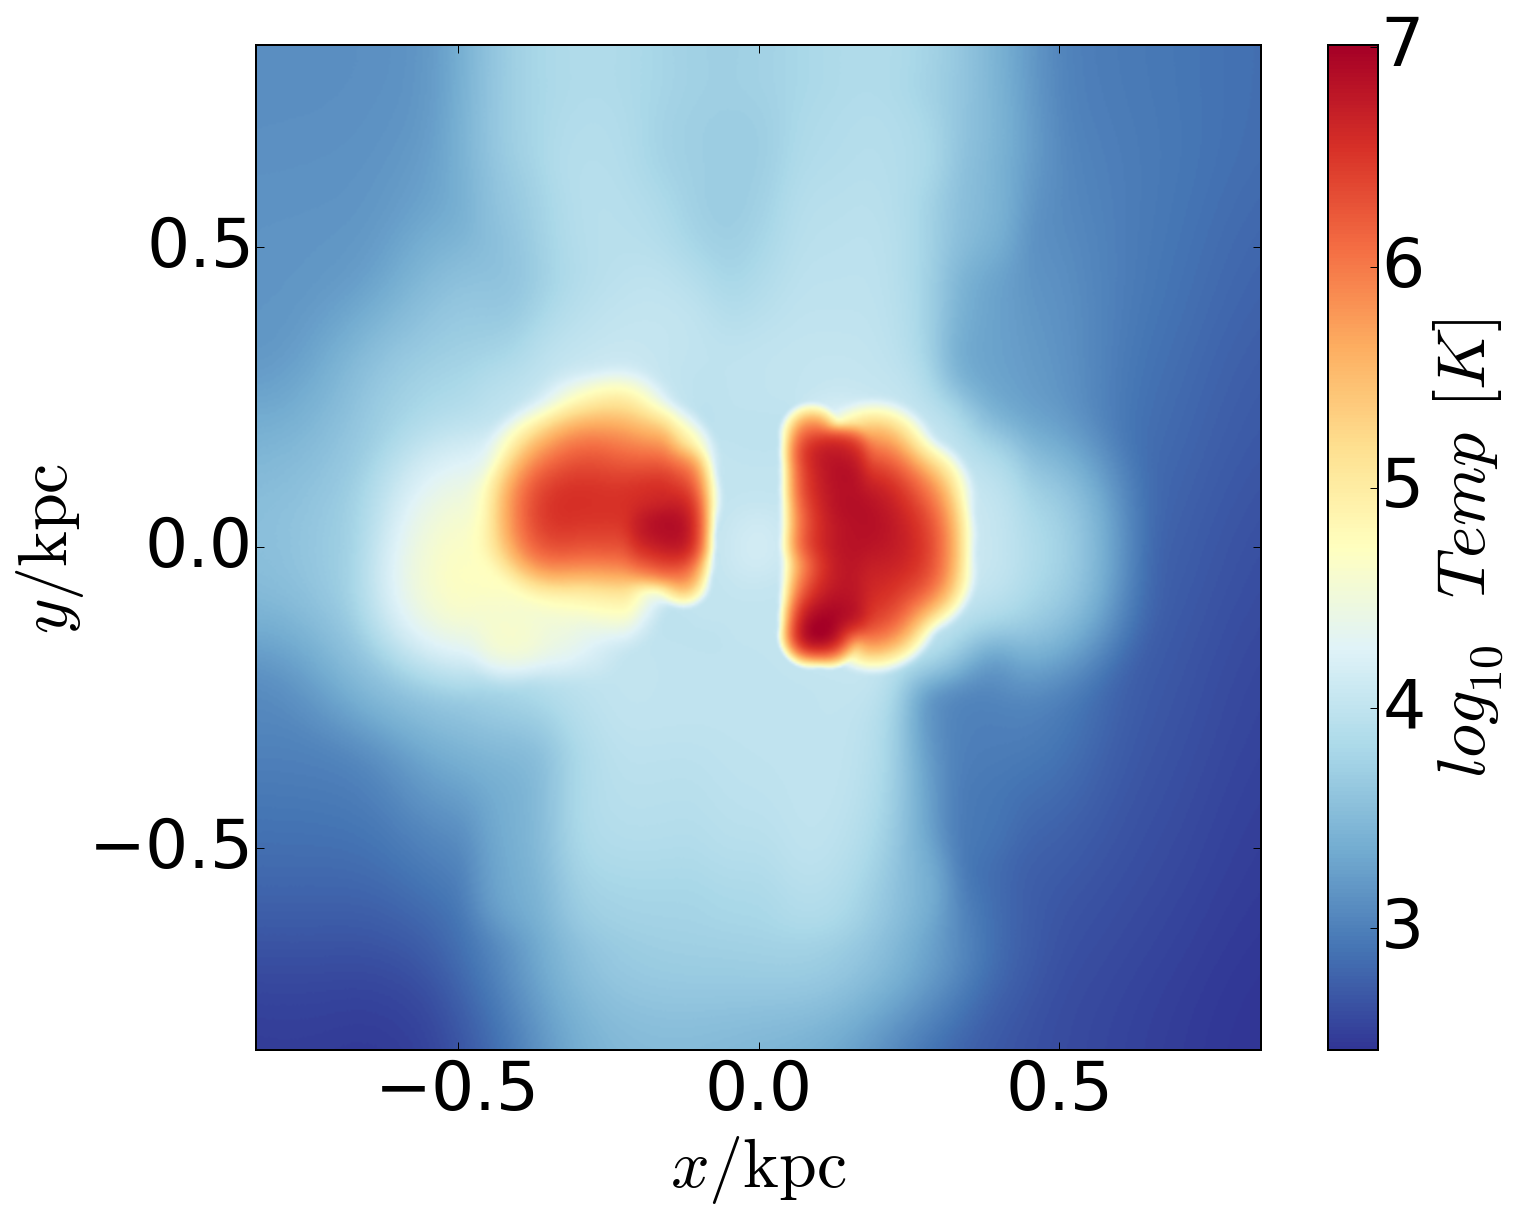

In [13]:
coords= [-rx,-ry,-rz] # Translation requires negative of the coord
with pynbody.transformation.translate(impData,coords):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    im = sph.image(impData.g,qty="temp",width=smallbox,cmap="RdYlBu_r", denoise=True ,av_z=False, #ret_im=True,
                   log=True, subplot=ax, approximate_fast=False,qtytitle="$log_{10}\; Temp\, [K]$"
                   ,show_cbar=True
                  ); #vmin=0.006, vmax=1.0,
    #cbar = fig.colorbar(im)
    #plt.colorbar(im,format=custom_formatter)
    plt.show()

$v_{t}$ @ z = 16.0
Thin slice @ [-44.54, -19.03, -118.77]


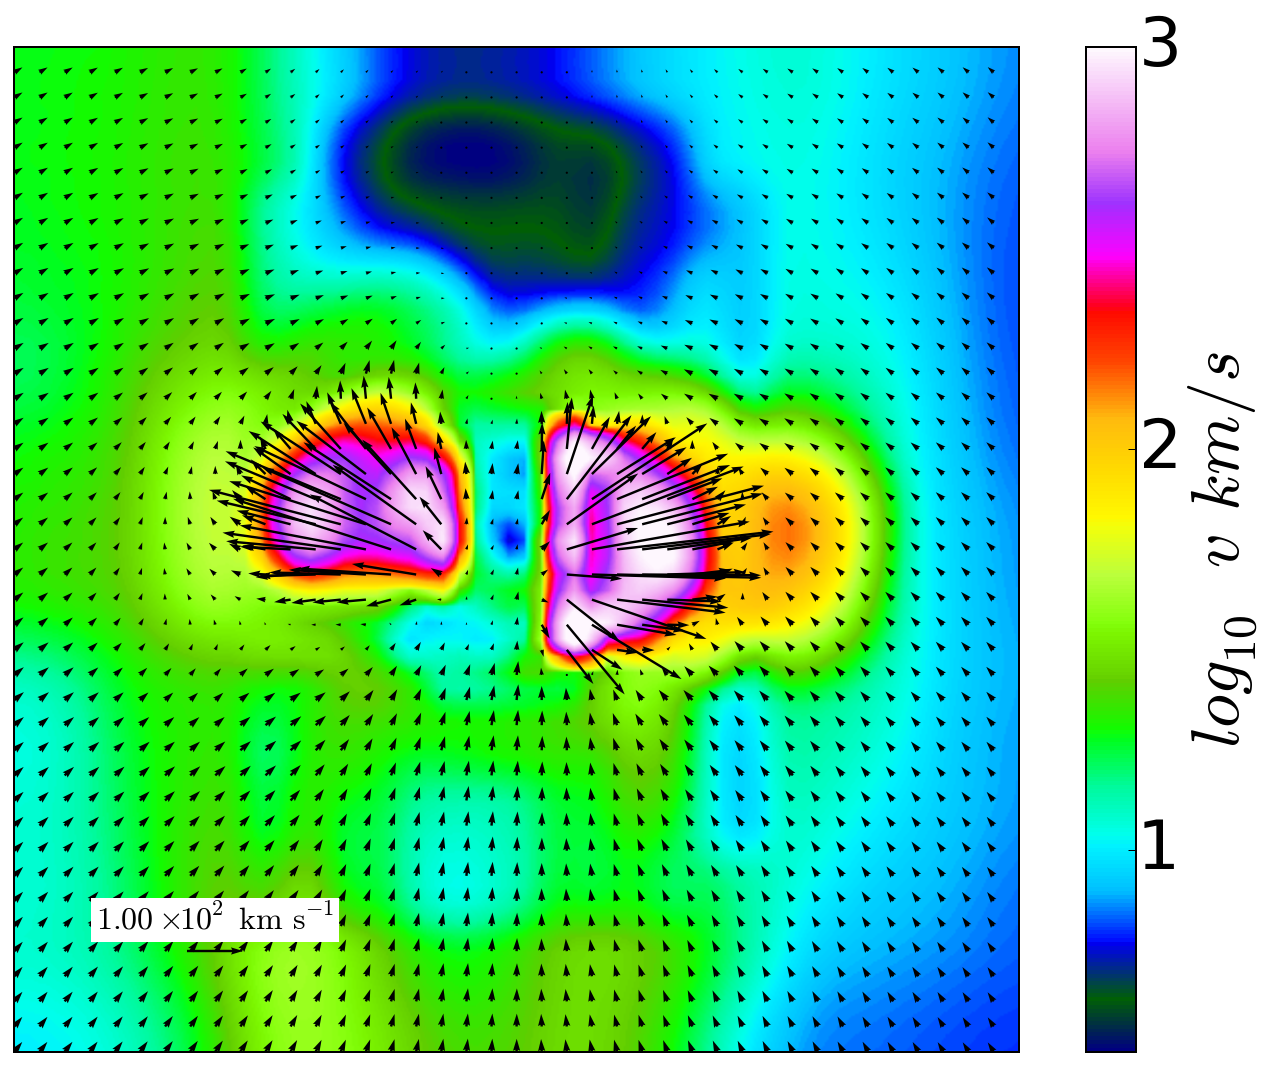

In [12]:
coords= [-rx,-ry,-rz] # Translation requires negative of the coord
with pynbody.transformation.translate(impData,coords):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    fileOut="img_vt-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "$v_{t}$ @ z = %.1f" % z + "\nThin slice @ %s" % str(coords)
    print(titleStr)
    pynbody.plot.sph.velocity_image(impData.g, qty="tv", width=smallbox, cmap = "gist_ncar", 
                    mode='quiver', key_color='black',qtytitle="$log_{10}\; v\, km/s$",quiverkey_bg_color='w',
                    key_x=0.2, key_y=0.1,
                    density = 1.0, vector_resolution=40, vmax=1e3,subplot=ax,
                    show_cbar=True, vector_color='black')
    plt.show()
#    plt.savefig(fileOut)  # Needed since filename=fileOut doesn't include the vel vecs
#    plt.close(fig)